In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()

In [6]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [8]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
df = pd.DataFrame(digits.data)

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [17]:
df['target'] = digits.target

In [18]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop(df.target,axis = 1)
y = df.target

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [32]:
model = KNeighborsClassifier(n_neighbors = 5)

In [33]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
model.score(X_test,y_test)

0.9833333333333333

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
scores = []

In [43]:
model_params = {
    'knn':{
        'model':KNeighborsClassifier(),
        'params':
        {
            'n_neighbors':[3,5,10,20],
            
        }
    }
}

In [45]:
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],return_train_score=False,cv = 5)
    clf.fit(X,y)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

In [46]:
scores = pd.DataFrame(scores)

In [48]:
scores

,model_name,best_score,best_params
0,knn,0.96717,{'n_neighbors': 3}


In [49]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9805555555555555

so we conclude that n_neoghbours = 3 is the ideal value

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
y_predicted = model.predict(X_test)

In [52]:
cm = confusion_matrix(y_test,y_predicted)

In [53]:
import seaborn as sns

<AxesSubplot:>

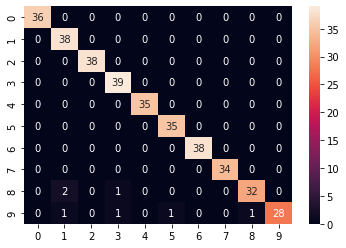

In [54]:
sns.heatmap(cm,annot = True)

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.93      1.00      0.96        38
           2       1.00      1.00      1.00        38
           3       0.95      1.00      0.97        39
           4       1.00      1.00      1.00        35
           5       0.97      1.00      0.99        35
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        34
           8       0.97      0.91      0.94        35
           9       1.00      0.88      0.93        32

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

